In [64]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [65]:
image = io.imread(r"e72_33_0021.tif")

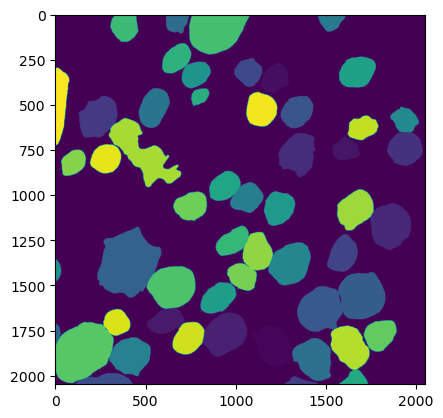

In [66]:
plt.imshow(image)

In [67]:
crop=image[1250:1500, 1000:1300]
print(crop.shape)
crop



(250, 300)


array([[36, 36, 36, ...,  0,  0,  0],
       [36, 36, 36, ...,  0,  0,  0],
       [36, 36, 36, ...,  0,  0,  0],
       ...,
       [43, 43, 43, ...,  0,  0,  0],
       [43, 43, 43, ...,  0,  0,  0],
       [43, 43, 43, ...,  0,  0,  0]], dtype=int32)

250

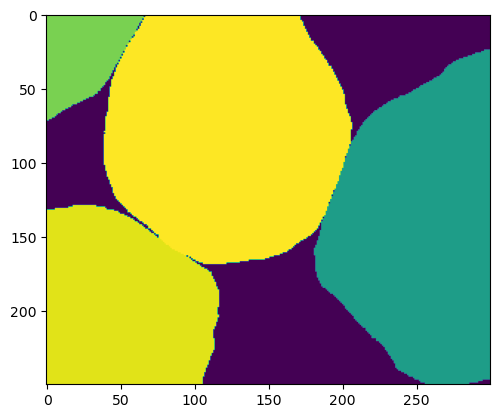

In [68]:
plt.imshow(crop)
crop.shape[0]

In [69]:
def boolean_kernel(crop):
    unique_labels = np.unique(crop)
    if unique_labels.size > 1:
      return 0
    else:
       return crop[1,1]

def pbp_operation(image):
    image_eroded = np.zeros(image.shape)
    for x in range(image.shape[1]-2):
      for y in range(image.shape[0]-2):
        crop = image[y:y+3, x:x+3]
        #if(y==100):
        #  print(crop.shape)
        current_result = boolean_kernel(crop)
        image_eroded[y+1, x+1] = current_result
  
    return image_eroded

res1 = pbp_operation(crop)

In [70]:
print(res1.shape)
res1

(250, 300)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 36., 36., ...,  0.,  0.,  0.],
       [ 0., 36., 36., ...,  0.,  0.,  0.],
       ...,
       [ 0., 43., 43., ...,  0.,  0.,  0.],
       [ 0., 43., 43., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

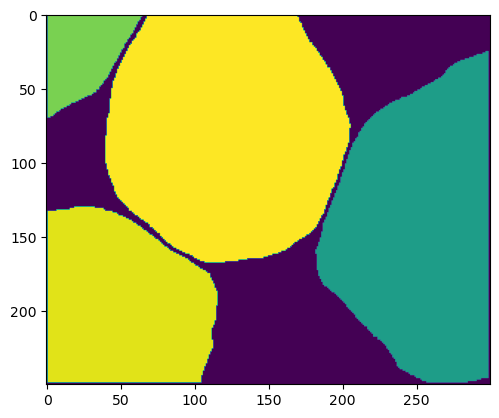

In [71]:
plt.imshow(res1)

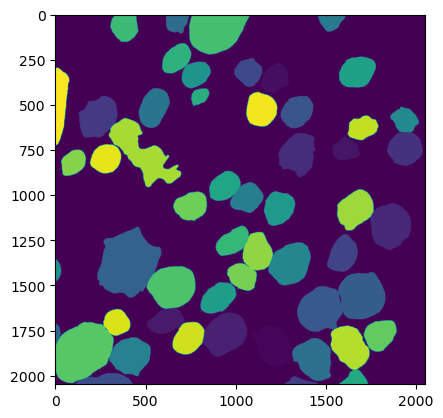

In [72]:
res2 = pbp_operation(image)
plt.imshow(res2)

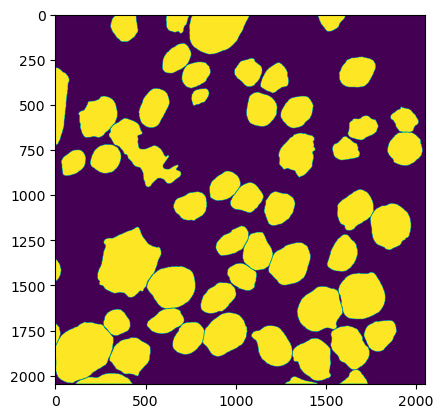

In [79]:
binary = res2 > 0
plt.imshow(binary)

In [80]:
from scipy.ndimage.morphology import distance_transform_edt

C:\Users\Pau\AppData\Local\Temp\ipykernel_14260\1701541448.py:1: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt


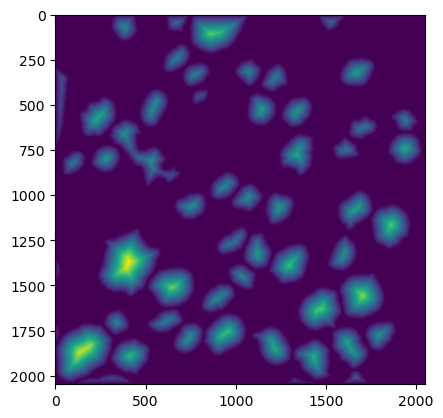

In [81]:
dt = distance_transform_edt(binary)
plt.imshow(dt)

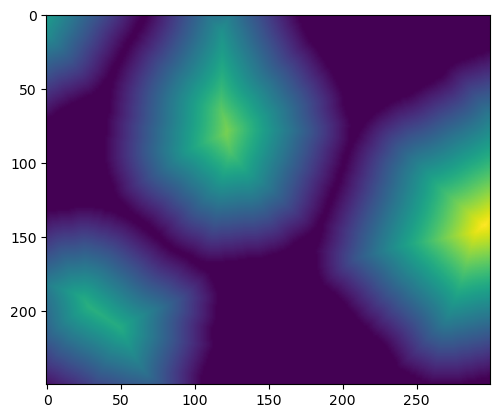

In [83]:
dt_crop = dt[1250:1500, 1000:1300]
plt.imshow(dt_crop)